<a href="https://colab.research.google.com/github/Liamsalass/Titanic-Survival-Prediction-Hackathon/blob/main/Copy_of_Titanic_Survival_Prediction_(Liam_Olivia_Zackary).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Camp QMIND Intro Hackathon - Titanic Survival Prediction

To Do's

1. Remove unnecessary columns
2. Recalculate age without counting null
3. Replace null age with age mean


Import relevant libraries and packages 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Read in train and test data

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Liamsalass/CampQMIND2021/main/Hackathons/Intro_Hackathon/titanic_train.csv') # reading train data into "df_train"
df_test = pd.read_csv('https://raw.githubusercontent.com/Liamsalass/CampQMIND2021/main/Hackathons/Intro_Hackathon/titanic_test.csv') # reading test data into "df_test"

Inspect the training dataset

In [ ]:
df_train.head(10) # print the first 10 rows of the training set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
1,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
2,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
3,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
4,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
5,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
6,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
7,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
8,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
9,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q


In [ ]:
df_train.shape # print the number of rows and columns in the training set

(711, 12)

In [ ]:
df_train.columns # print column names for training set

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_train.describe() # statistical summary of training dataset columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,711.000000,711.000000,711.000000,560.000000,711.000000,711.000000,711.000000
mean,452.794655,0.375527,2.298172,30.093161,0.510549,0.368495,31.886409
std,257.314342,0.484600,0.836481,14.362382,1.108019,0.806186,47.859701
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,237.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,454.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,670.500000,1.000000,3.000000,39.000000,1.000000,0.000000,30.695800
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.isnull().sum() # print the number of null values in each column of the training dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            151
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         1
dtype: int64

Inspect the test dataset

In [ ]:
df_test.head(10) # print the first 10 rows of the test set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
1,357,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S
2,753,3,"Vande Velde, Mr. Johannes Joseph",male,33.0,0,0,345780,9.5000,NaN,S
3,123,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
4,169,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
5,495,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,NaN,S
6,96,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
7,444,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
8,703,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,NaN,C
9,713,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S


In [ ]:
df_test.shape # print the number of rows and columns in the test set

(180, 11)

In [ ]:
df_test.columns # print column names for test set (*NOTE: there is no 'Survived' column in this dataset, since this is what YOU must predict)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_test.describe() # statistical summary of test dataset columns

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,180.000000,180.000000,154.000000,180.000000,180.000000,180.000000
mean,419.161111,2.350000,28.266234,0.572222,0.433333,33.459514
std,256.464252,0.835491,15.069357,1.083294,0.805706,56.487116
min,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,194.000000,2.000000,18.000000,0.000000,0.000000,7.895800
50%,426.000000,3.000000,25.500000,0.000000,0.000000,14.454200
75%,653.500000,3.000000,35.750000,1.000000,1.000000,31.387500
max,867.000000,3.000000,71.000000,5.000000,5.000000,512.329200


In [ ]:
df_test.isnull().sum() # print the number of null values in each column of the test dataset

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             26
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          138
Embarked         1
dtype: int64

Perform some data visualization to further inspect the train data

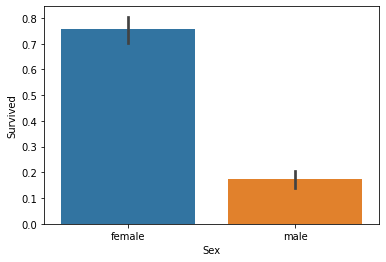

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df_train) # likelyhood of survival based on gender

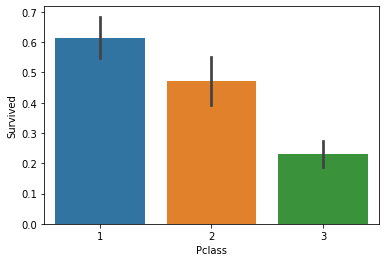

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df_train)

Data cleaning and feature engineering

In [ ]:
df_train_dropped = df_train.drop(columns=['PassengerId','Name',
       'Ticket', 'Fare', 'Cabin', 'Embarked'])
df_train_dropped.drop_duplicates(inplace=True)
print(df_train_dropped)

     Survived  Pclass     Sex   Age  SibSp  Parch
0           0       3  female  24.0      0      0
1           0       2    male  46.0      0      0
2           1       1  female  35.0      1      0
3           0       3  female  47.0      1      0
4           0       3    male  16.0      4      1
..        ...     ...     ...   ...    ...    ...
700         1       1  female  33.0      1      0
701         0       3    male  26.0      1      2
702         0       3    male  48.0      0      0
704         1       2    male  42.0      0      0
709         1       1    male  45.0      0      0

[431 rows x 6 columns]


In [ ]:
df_train_withoutnull = df_train_dropped.dropna()
print(df_train_withoutnull)

     Survived  Pclass  Sex   Age  SibSp  Parch
0           0       3    1  24.0      0      0
1           0       2    0  46.0      0      0
2           1       1    1  35.0      1      0
3           0       3    1  47.0      1      0
4           0       3    0  16.0      4      1
..        ...     ...  ...   ...    ...    ...
700         1       1    1  33.0      1      0
701         0       3    0  26.0      1      2
702         0       3    0  48.0      0      0
704         1       2    0  42.0      0      0
709         1       1    0  45.0      0      0

[404 rows x 6 columns]


In [ ]:
df_train_withoutnull.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.450495,2.123762,0.428218,30.687921,0.606436,0.561881
std,0.498160,0.845088,0.495434,15.544563,0.929825,0.960062
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,30.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,41.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000


In [ ]:
df_train_age_mean = df_train_withoutnull["Age"].mean()
print (df_train_age_mean)

30.687920792079208


In [ ]:
df_train_dropped['Age'] = df_train_dropped['Age'].fillna(df_train_age_mean)
print(df_train_dropped)
df_train_dropped.isnull().sum()
df_train_dropped.describe()

     Survived  Pclass  Sex   Age  SibSp  Parch
0           0       3    1  24.0      0      0
1           0       2    0  46.0      0      0
2           1       1    1  35.0      1      0
3           0       3    1  47.0      1      0
4           0       3    0  16.0      4      1
..        ...     ...  ...   ...    ...    ...
700         1       1    1  33.0      1      0
701         0       3    0  26.0      1      2
702         0       3    0  48.0      0      0
704         1       2    0  42.0      0      0
709         1       1    0  45.0      0      0

[431 rows x 6 columns]


,Survived,Pclass,Sex,Age,SibSp,Parch
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,0.452436,2.148492,0.433875,30.687921,0.649652,0.563805
std,0.498311,0.847015,0.496184,15.048625,1.056648,0.952348
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,30.687921,0.000000,0.000000
75%,1.000000,3.000000,1.000000,40.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


In [ ]:
df_train_dropped.replace(['female', 'male'], [1, 0], inplace=True)

In [ ]:
df_test_dropped = df_test.drop(columns=['PassengerId','Name',
       'Ticket', 'Fare', 'Cabin', 'Embarked'])
df_test_dropped.drop_duplicates(inplace=True)
df_test_withoutnull = df_test_dropped.dropna()
df_test_age_mean = df_test_withoutnull["Age"].mean()
df_test_dropped['Age'] = df_test_dropped['Age'].fillna(df_test_age_mean)
df_test_dropped.replace(['female', 'male'], [1, 0])

,Pclass,Sex,Age,SibSp,Parch
0,1,0,36.000000,0,1
1,1,1,22.000000,0,1
2,3,0,33.000000,0,0
3,2,0,32.500000,1,0
4,1,0,28.917293,0,0
...,...,...,...,...,...
169,3,1,29.000000,1,1
170,1,0,64.000000,1,4
171,1,1,35.000000,0,0
177,3,1,14.000000,0,0


Train test split

In [ ]:
from sklearn.model_selection import train_test_split

x = df_train_dropped.drop(columns='Survived')
y = df_train_dropped['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x.isnull().sum()


Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
dtype: int64

Build and evaluate model

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[ 1.00994829,  1.15079291,         nan,  0.26530272, -0.60377376],
       [ 1.00994829, -0.86896608,  0.51299035, -0.62075684, -0.60377376],
       [-0.16775412, -0.86896608, -0.50048081,  1.15136228,  0.42443502],
       ...,
       [-1.34545653,  1.15079291, -0.94387445, -0.62075684, -0.60377376],
       [ 1.00994829, -0.86896608, -0.56382276, -0.62075684, -0.60377376],
       [ 1.00994829,  1.15079291, -0.56382276, -0.62075684, -0.60377376]])

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state = 0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

acc =  accuracy_score(y_test, y_pred)
print(acc)

0.8045977011494253


Submit predictions

In [ ]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred})

submit.to_csv('./titanic_submission_group-#.csv',index = False)